# Exercise 6

In this exercise, we use the one dimensional Ising Model with periodic boundary conditions , $s_{N+1}=s_1$ , to describe a system of N spins , $\{s_i\}_{i=1,N}$ ,  where  $s_i=\pm 1$. 

The hamiltonian for this system with nearest neighbours interaction is:

$$
H = 
-J\sum_{i=1}^N s_i s_{i+1}
-\frac{h}{2}\sum_{i=1}^N (s_i + s_{i+1}) 
$$

where $J$ is an interaction costant and $h$ is the applied magnetic field.

For the temperature $T\in[0.5,2]$, we want to measure the quantites:
 -  **Internal Energy** : $U(N,T,h=0)=\langle H \rangle_{h=0}$
 -  **Magnetization** : $M(N,T,h=0.02)=\langle \sum_{i=1,N}s_i \rangle_{h=0.02}$
 -  **Magnetic susceptibility** : $\chi(N,T,h=0)=\beta \langle (\sum_{i=1,N}s_i)^2 \rangle_{h=0}$
 -  **Heat Capacity** : $C(N,T,h=0)=k_B \beta^2 (\langle H^2 \rangle_{h=0}-\langle H \rangle_{h=0}^2)$
 
The initial configuration is given by a random process where the probabilities to have spin up ($+1$) or spin down ($-1$) are: $P(-1)=P(+1)=\frac{1}{2}$ .

We use to simulate the model the Metropolis algorithm and the Gibbs algorithm.
In particular at each step we propose $N$ spin changes.
The energy difference, where only a spin has been flipped, $s_i \rightarrow -s_i$, is:
$$\Delta E=E_{new}-E_{old}\\=[+Js_{i-1}s_i+Js_{i}s_{i+1}-\frac{h}{2}(s_{i-1}-s_i-s_i+s_{i+1})]-[-Js_{i-1}s_i-Js_{i}s_{i+1}-\frac{h}{2}(s_{i-1}+s_i+s_i+s_{i+1})]$$

$$\implies \Delta E = 2Js_i(s_{i-1}+s_{i+1})+2hs_i$$
 
 
## Parameters 
- $T\in[0.5,2]$;
- $\Delta T=0.05$;
- $J=1$;
- $k_B=1$;
- $N=50$;
- $N_{blocks}=100$;
- $L=10000$.

 
 
# <font color="red"> Equilibrium 
    
    

--------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------


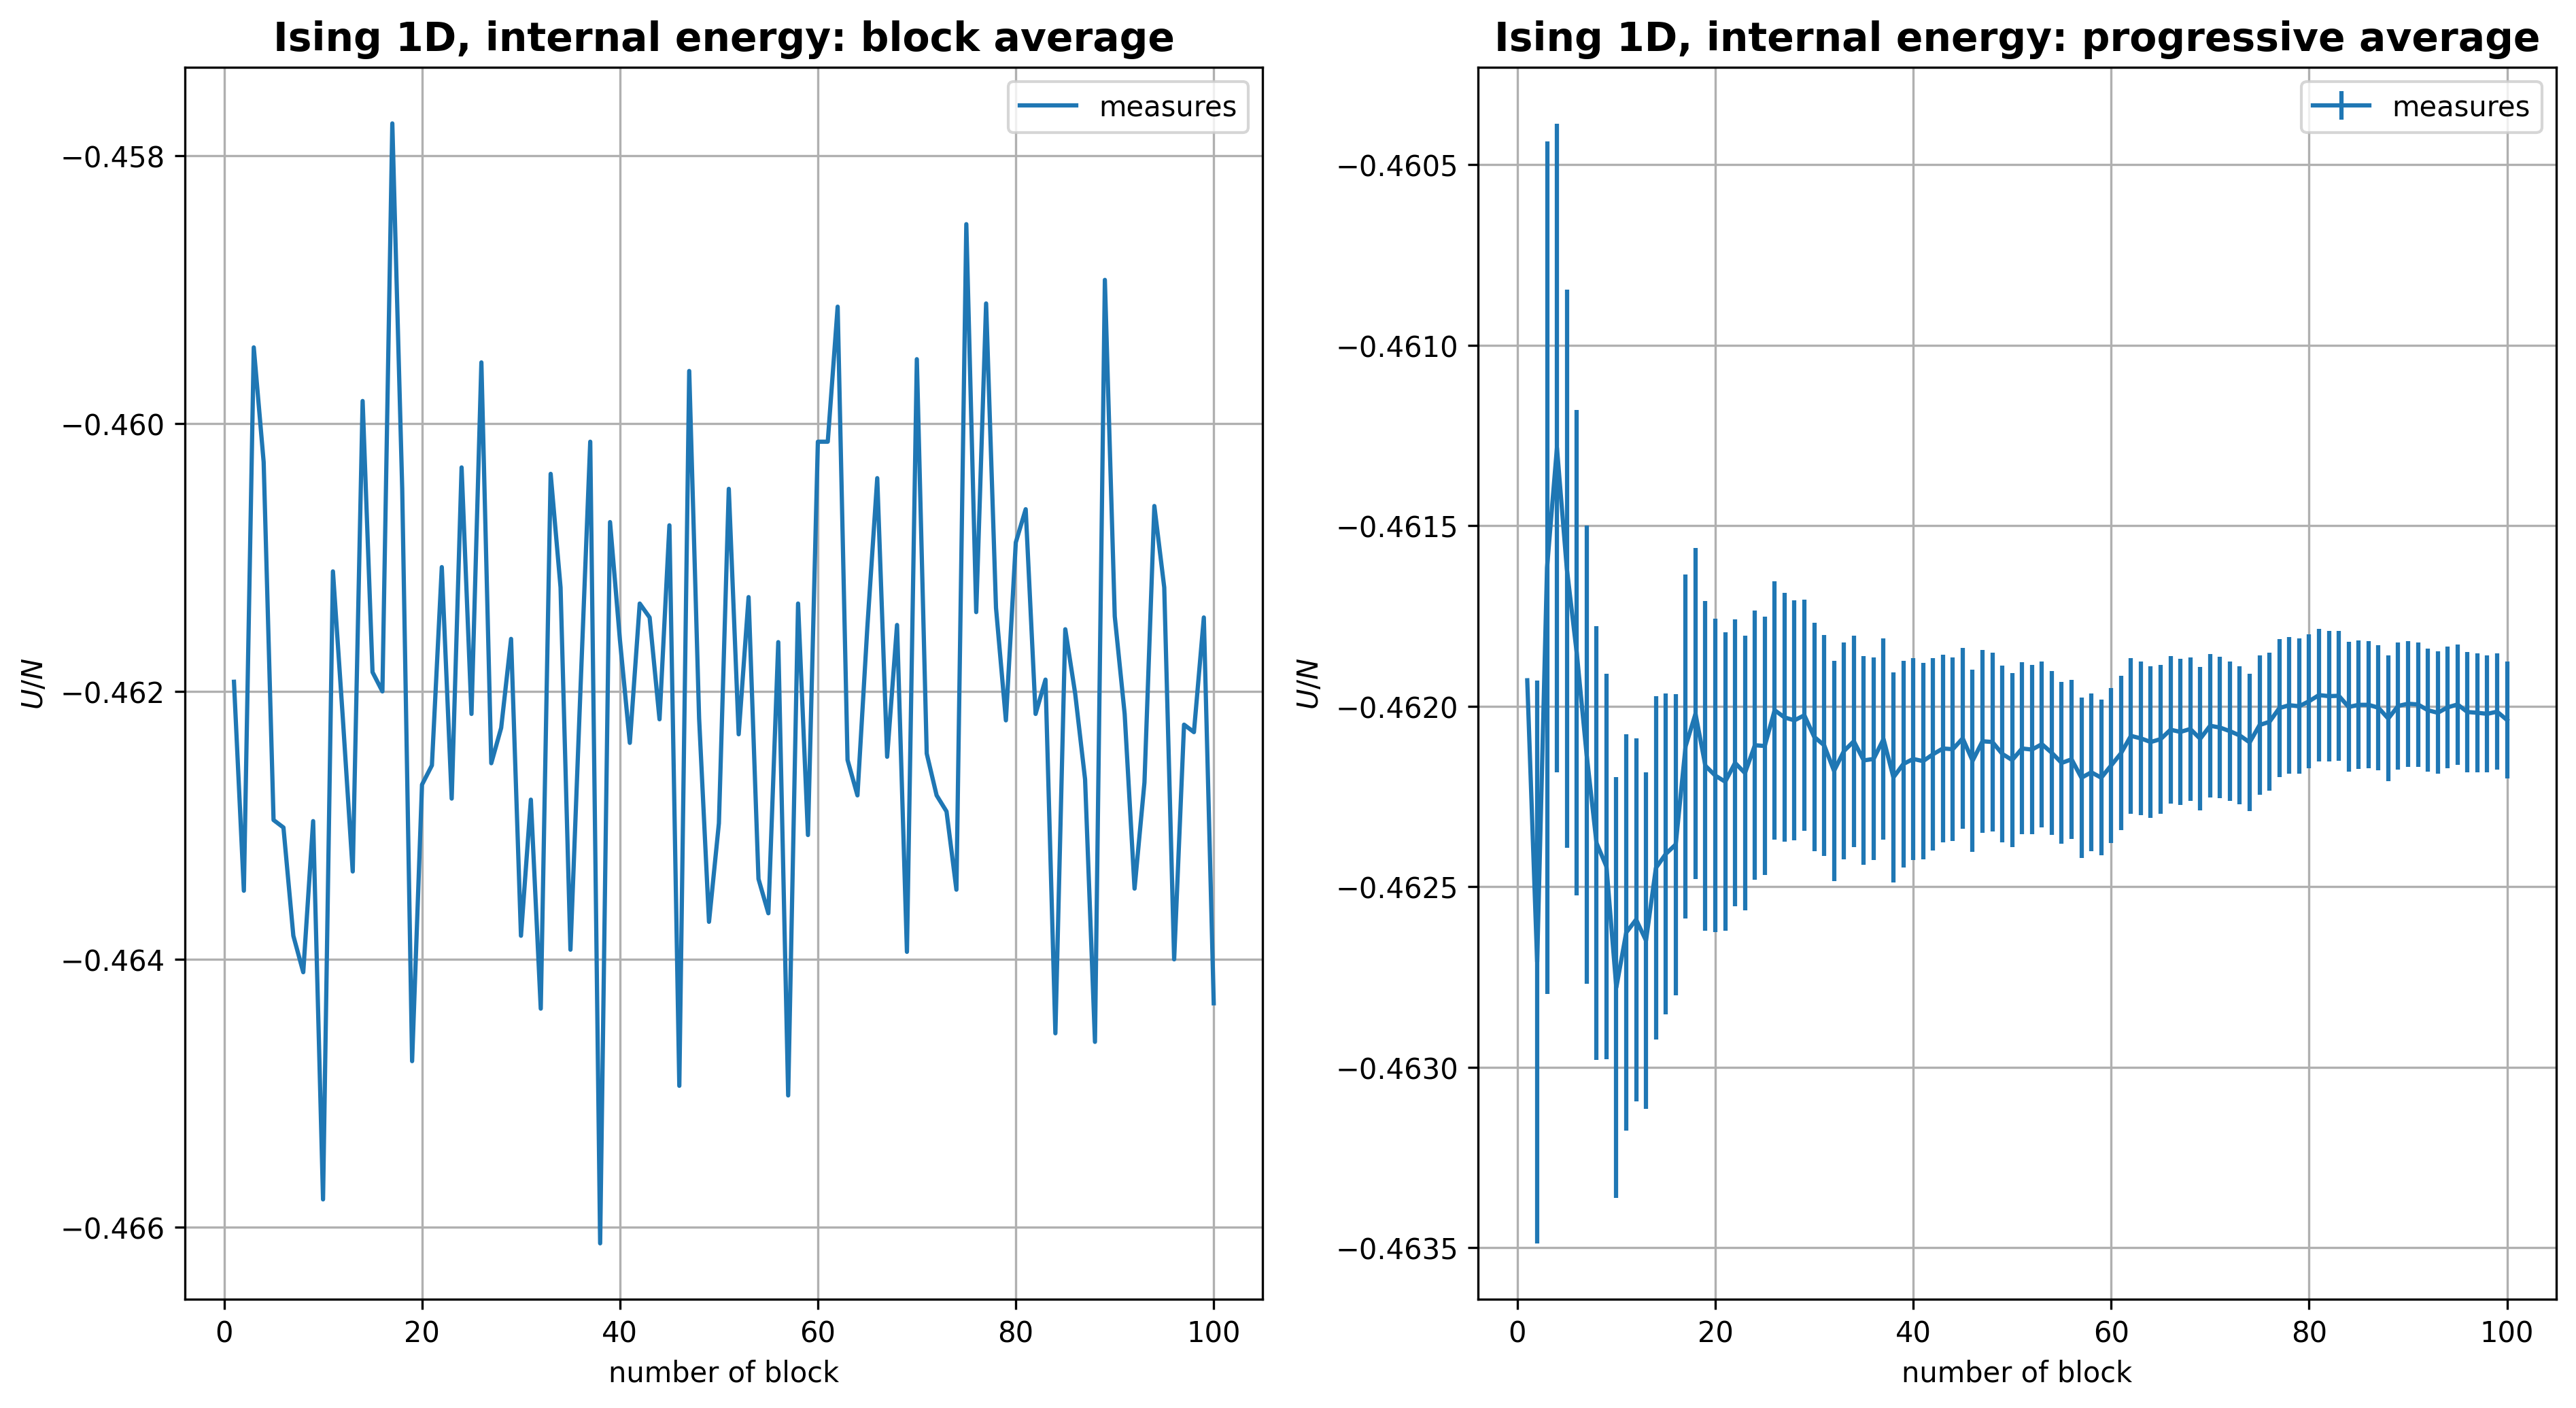

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
Titles=["Ising 1D, internal energy",'Ising 1D, Heat capacity','Ising 1D, Susceptibility','Ising 1D, magnetization M with h = 0.02']
print('--------------------------------------------------------------------------------------------------')


fig=plt.figure(figsize=(15,8),dpi=300)

x , y, f, error = np.loadtxt("ISING_1D/output.ene.0",max_rows=(100), usecols=(0,1,2,3),unpack='true')        
plt.subplot(1,2,1)
plt.plot(x,y,label = "measures")
plt.xlabel('number of block')
plt.ylabel("$U/N$")
plt.grid(True)
plt.legend()
plt.title("Ising 1D, internal energy: block average",weight="bold",size="14")
plt.subplot(1,2,2)
plt.errorbar(x,f,error,label = "measures")
plt.xlabel('number of block')
plt.ylabel("$U/N$")
plt.grid(True)
plt.legend()
plt.title("Ising 1D, internal energy: progressive average",weight="bold",size="14")


print("------------------------------------------------------------------------------------------")



In the plot above, for $T=2$, metropolis method and $h=0$ , we plotted the block average value and progressive average value of $\frac{U}{N}$ for each block.
The system evolves towards equilibration in a few number of steps. 
Just to be sure, we set the number of equilibration steps equal to the lenght of a block.

# Plots

In [2]:

#U/N
points=100
T = np.linspace(0.1,2.5,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )
#Heat
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)
#Chi
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)
#M
h=0.02 #external field
b = 1/T
l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)
Results=[e,heat,X,M]



--------------------------------------------------------------------------------------------------


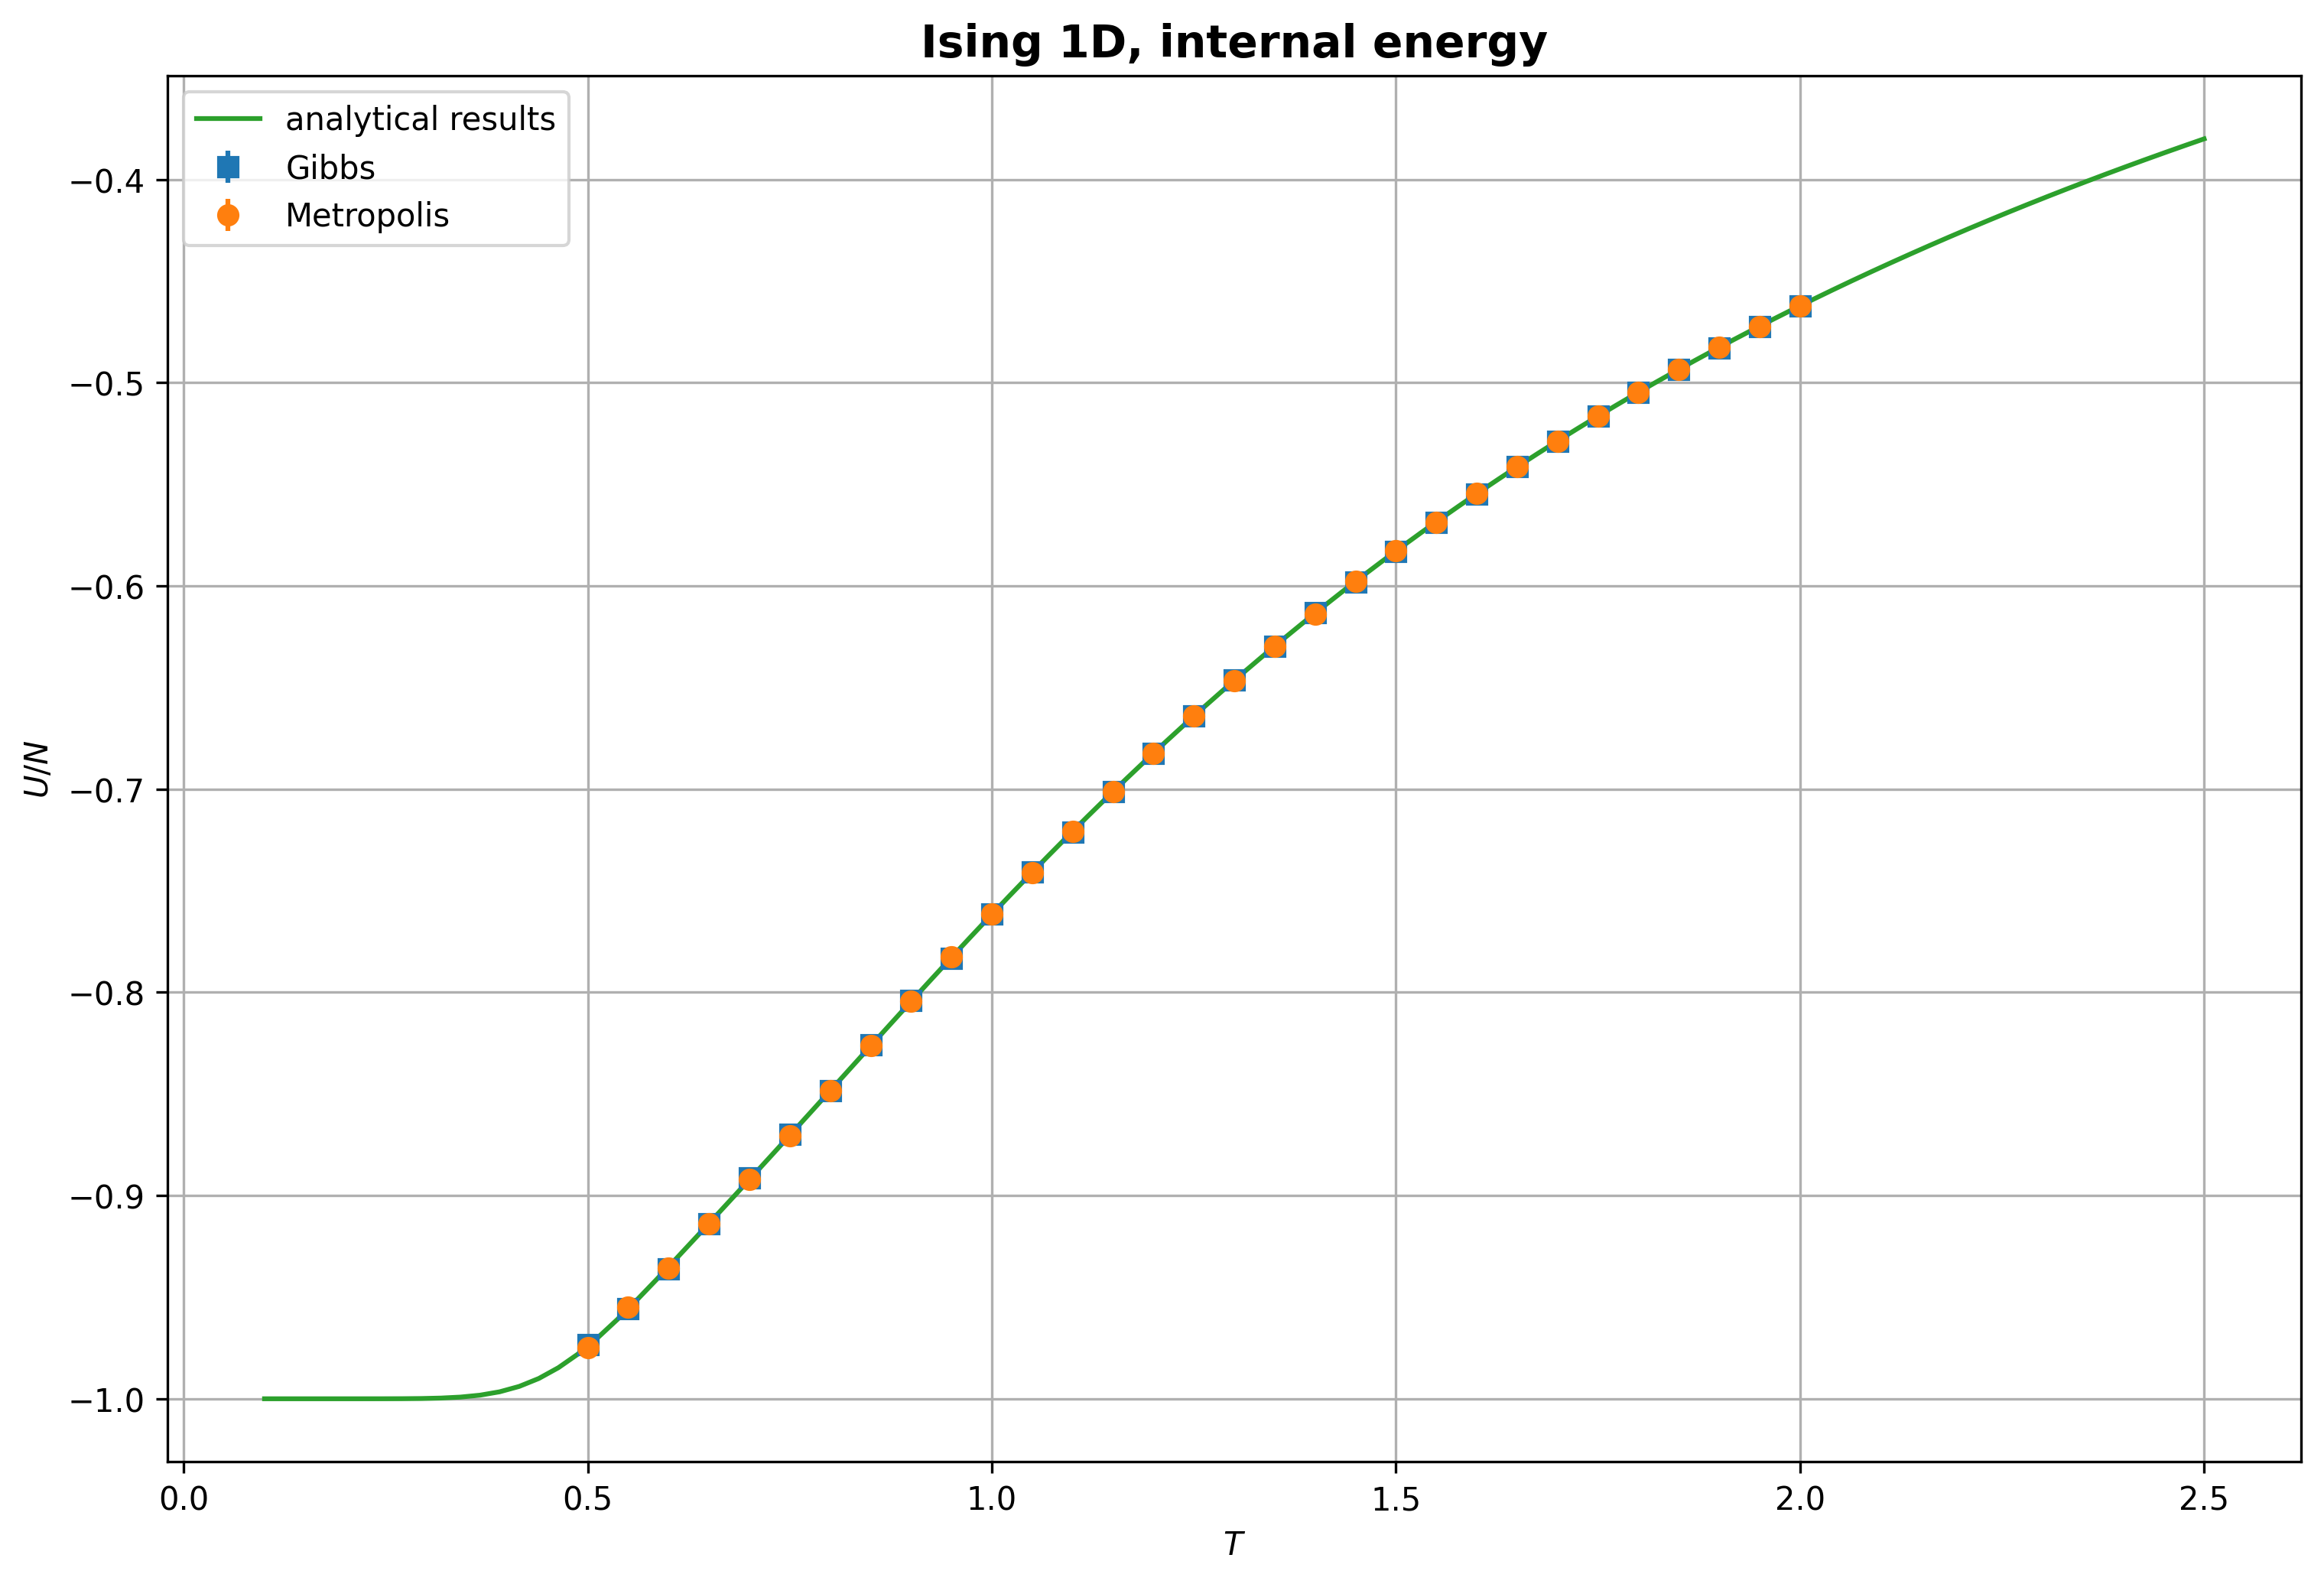

------------------------------------------------------------------------------------------


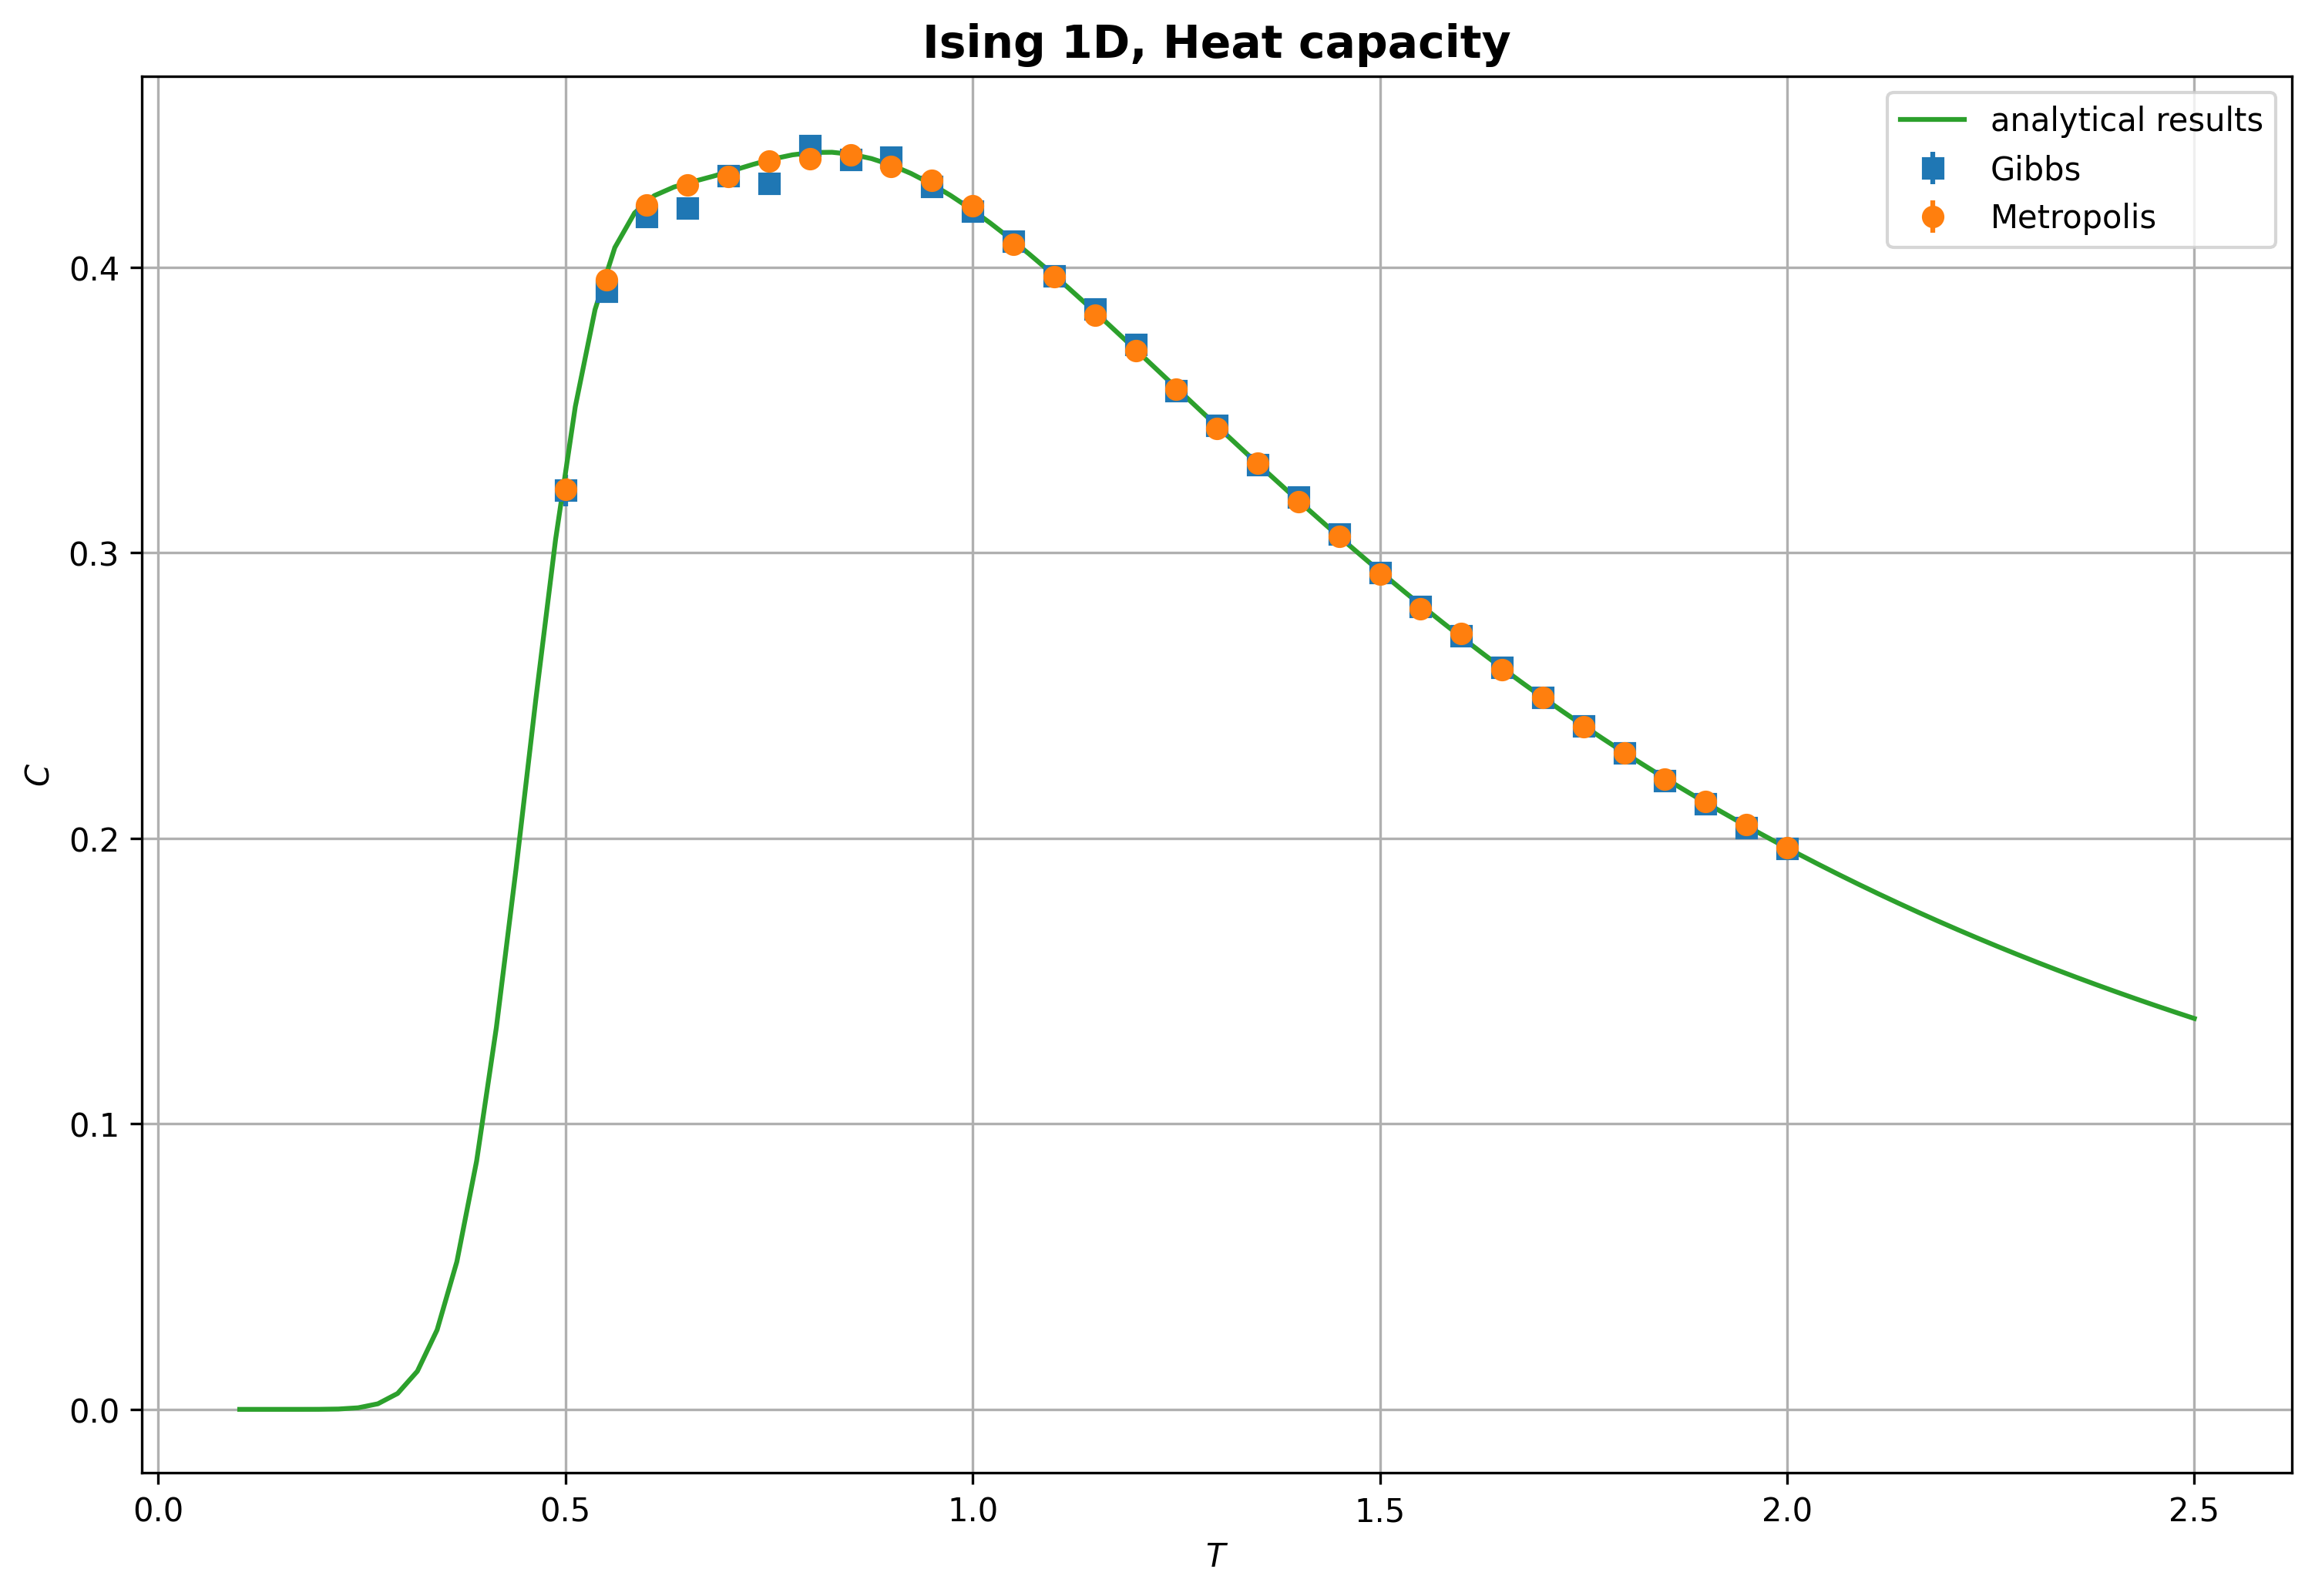

------------------------------------------------------------------------------------------


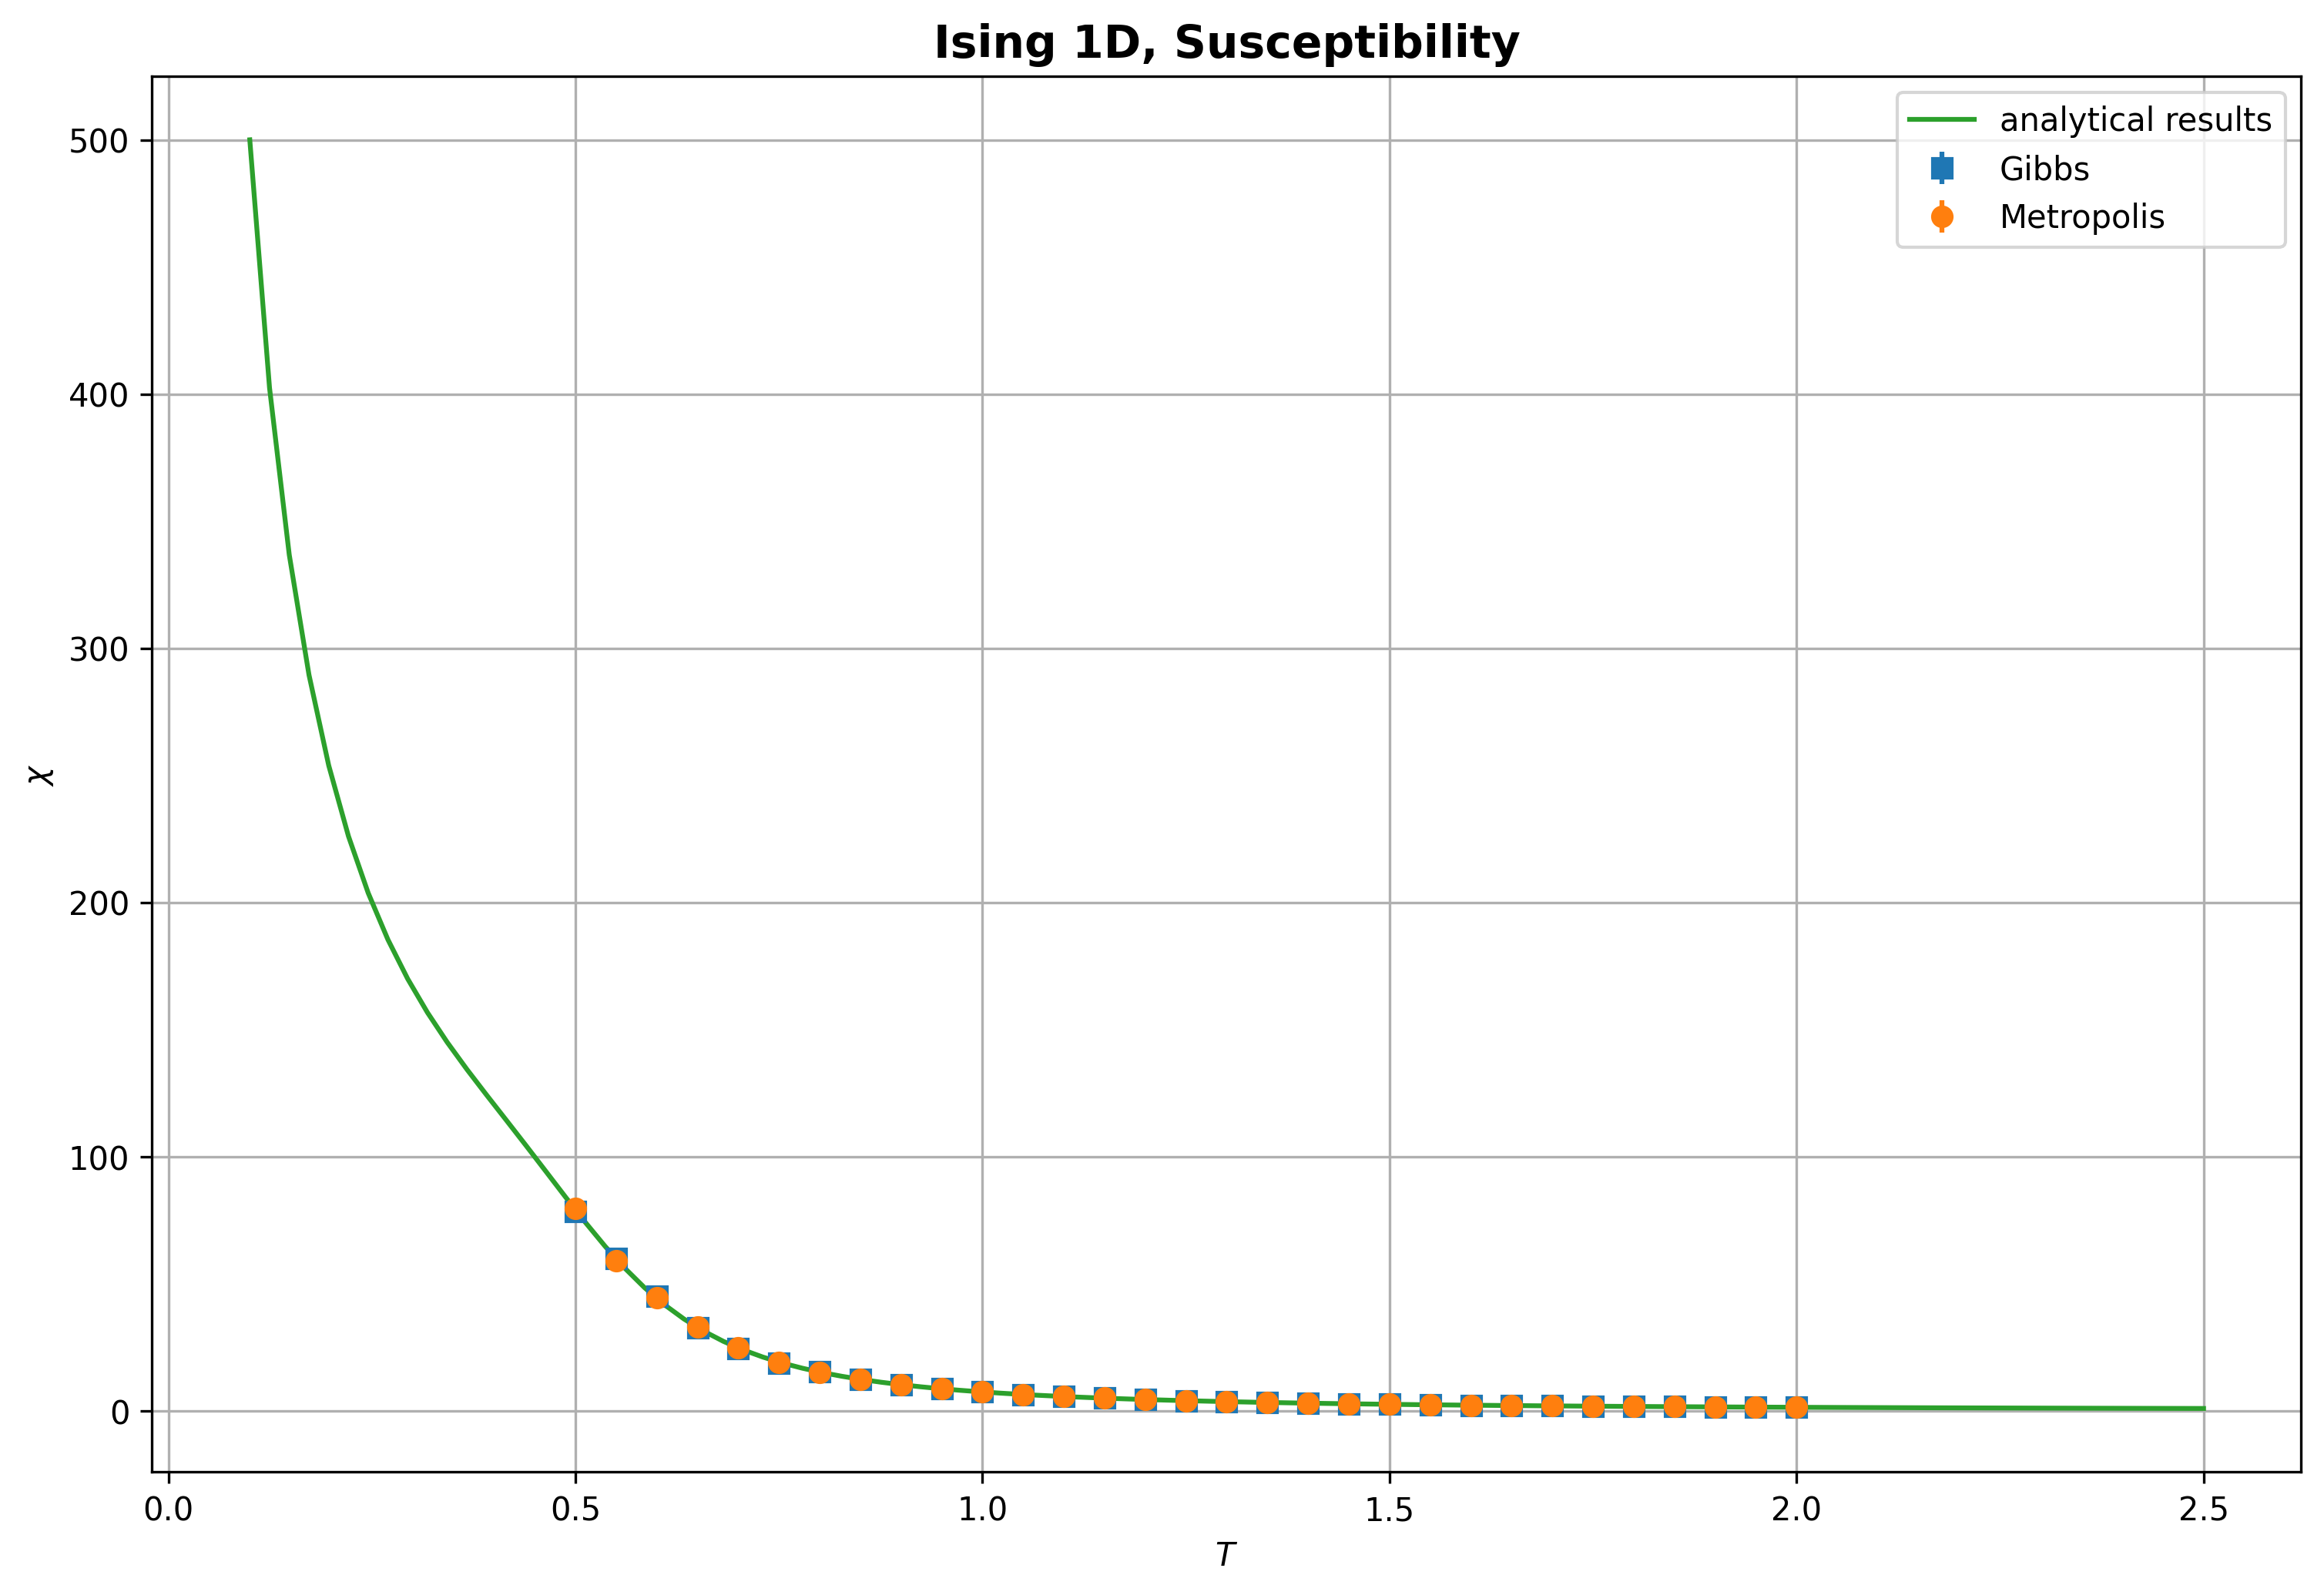

------------------------------------------------------------------------------------------


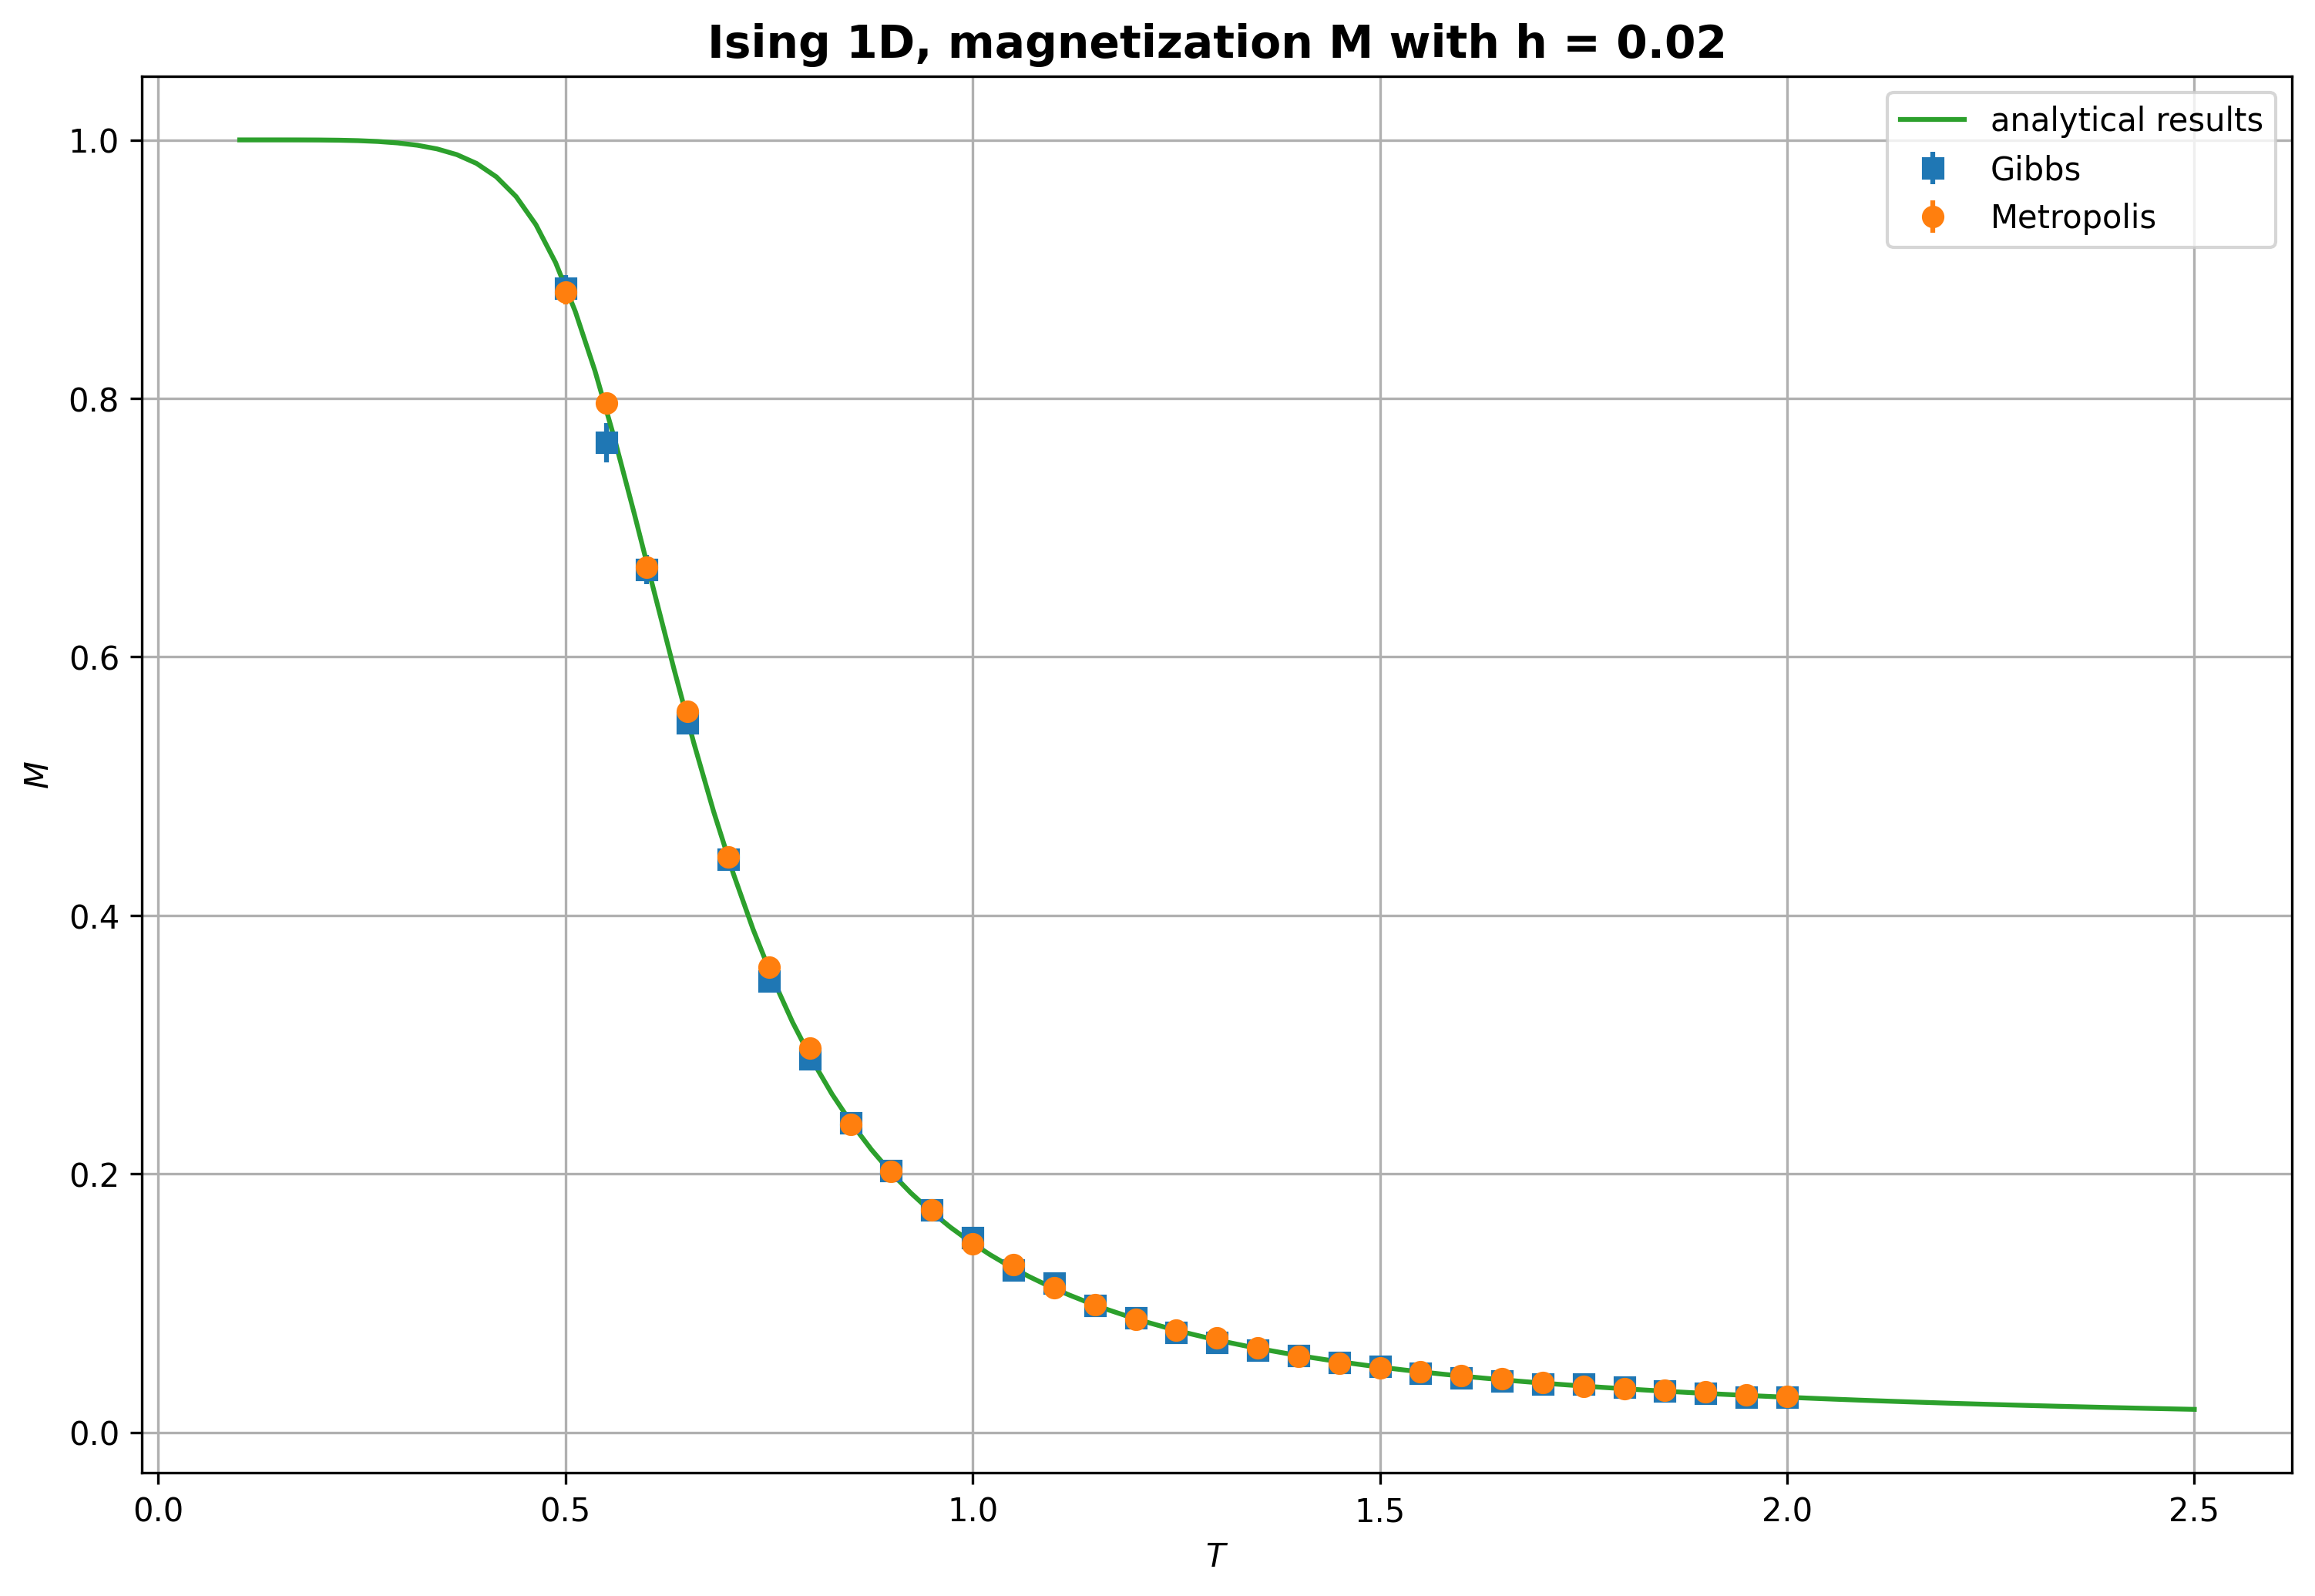

------------------------------------------------------------------------------------------


In [3]:
folder=["gibbs","metro"]
method=["Gibbs","Metropolis"]
file=["ene","heat","chi","mag"]
name=["$U/N$","$C$","$\chi$","$M$"]
ind=["s","o"]
Titles=["Ising 1D, internal energy",'Ising 1D, Heat capacity','Ising 1D, Susceptibility','Ising 1D, magnetization M with h = 0.02']
print('--------------------------------------------------------------------------------------------------')

for j in file:
    fig=plt.figure(figsize=(12,8),dpi=300)
        
    for i in folder:
        x , y, f, error = np.loadtxt("ISING_1D/results/"+i+"/output."+j+".0", usecols=(0,1,2,3), unpack='true')
        plt.errorbar(x,f,yerr=error,label = method[folder.index(i)],fmt=ind[folder.index(i)])
    plt.plot(T,Results[file.index(j)],label="analytical results")
    plt.xlabel('$T$')
    plt.ylabel(name[file.index(j)])
    plt.grid(True)
    plt.legend()
    plt.title(Titles[file.index(j)],weight="bold",size="14")
    plt.show()
    
    print("------------------------------------------------------------------------------------------")

--------------------------------------------------------------------------------------------------


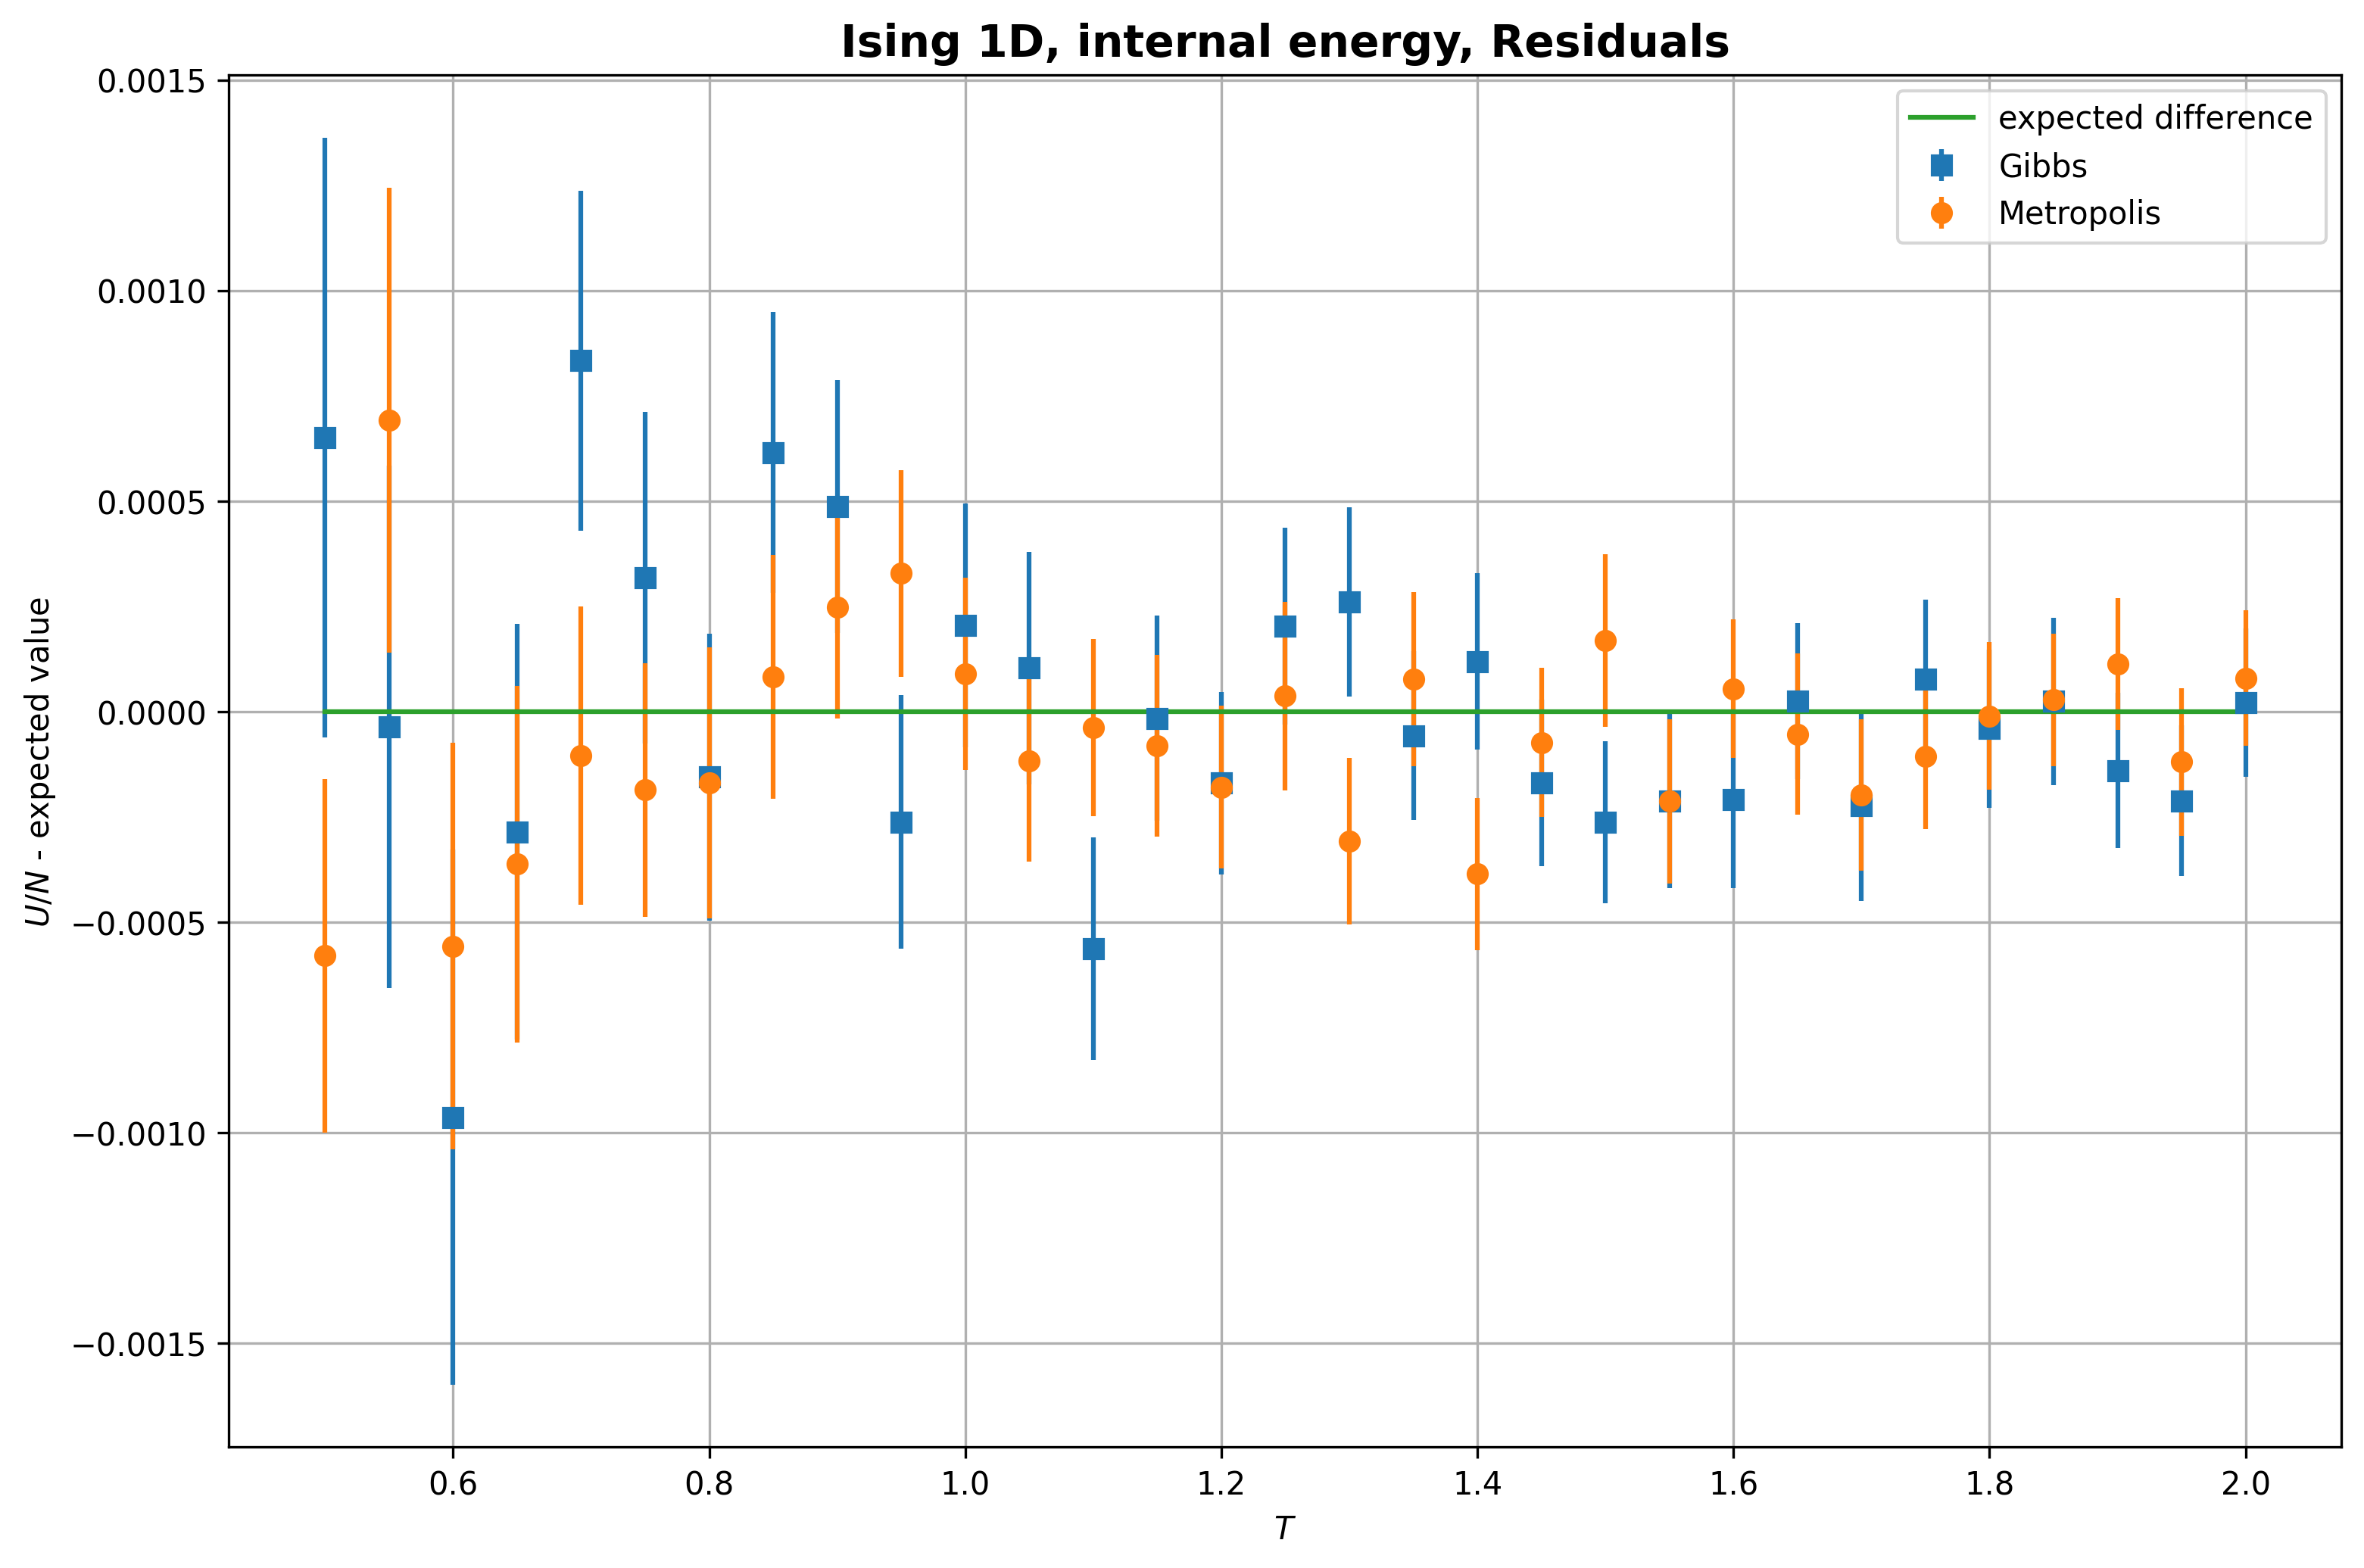

------------------------------------------------------------------------------------------


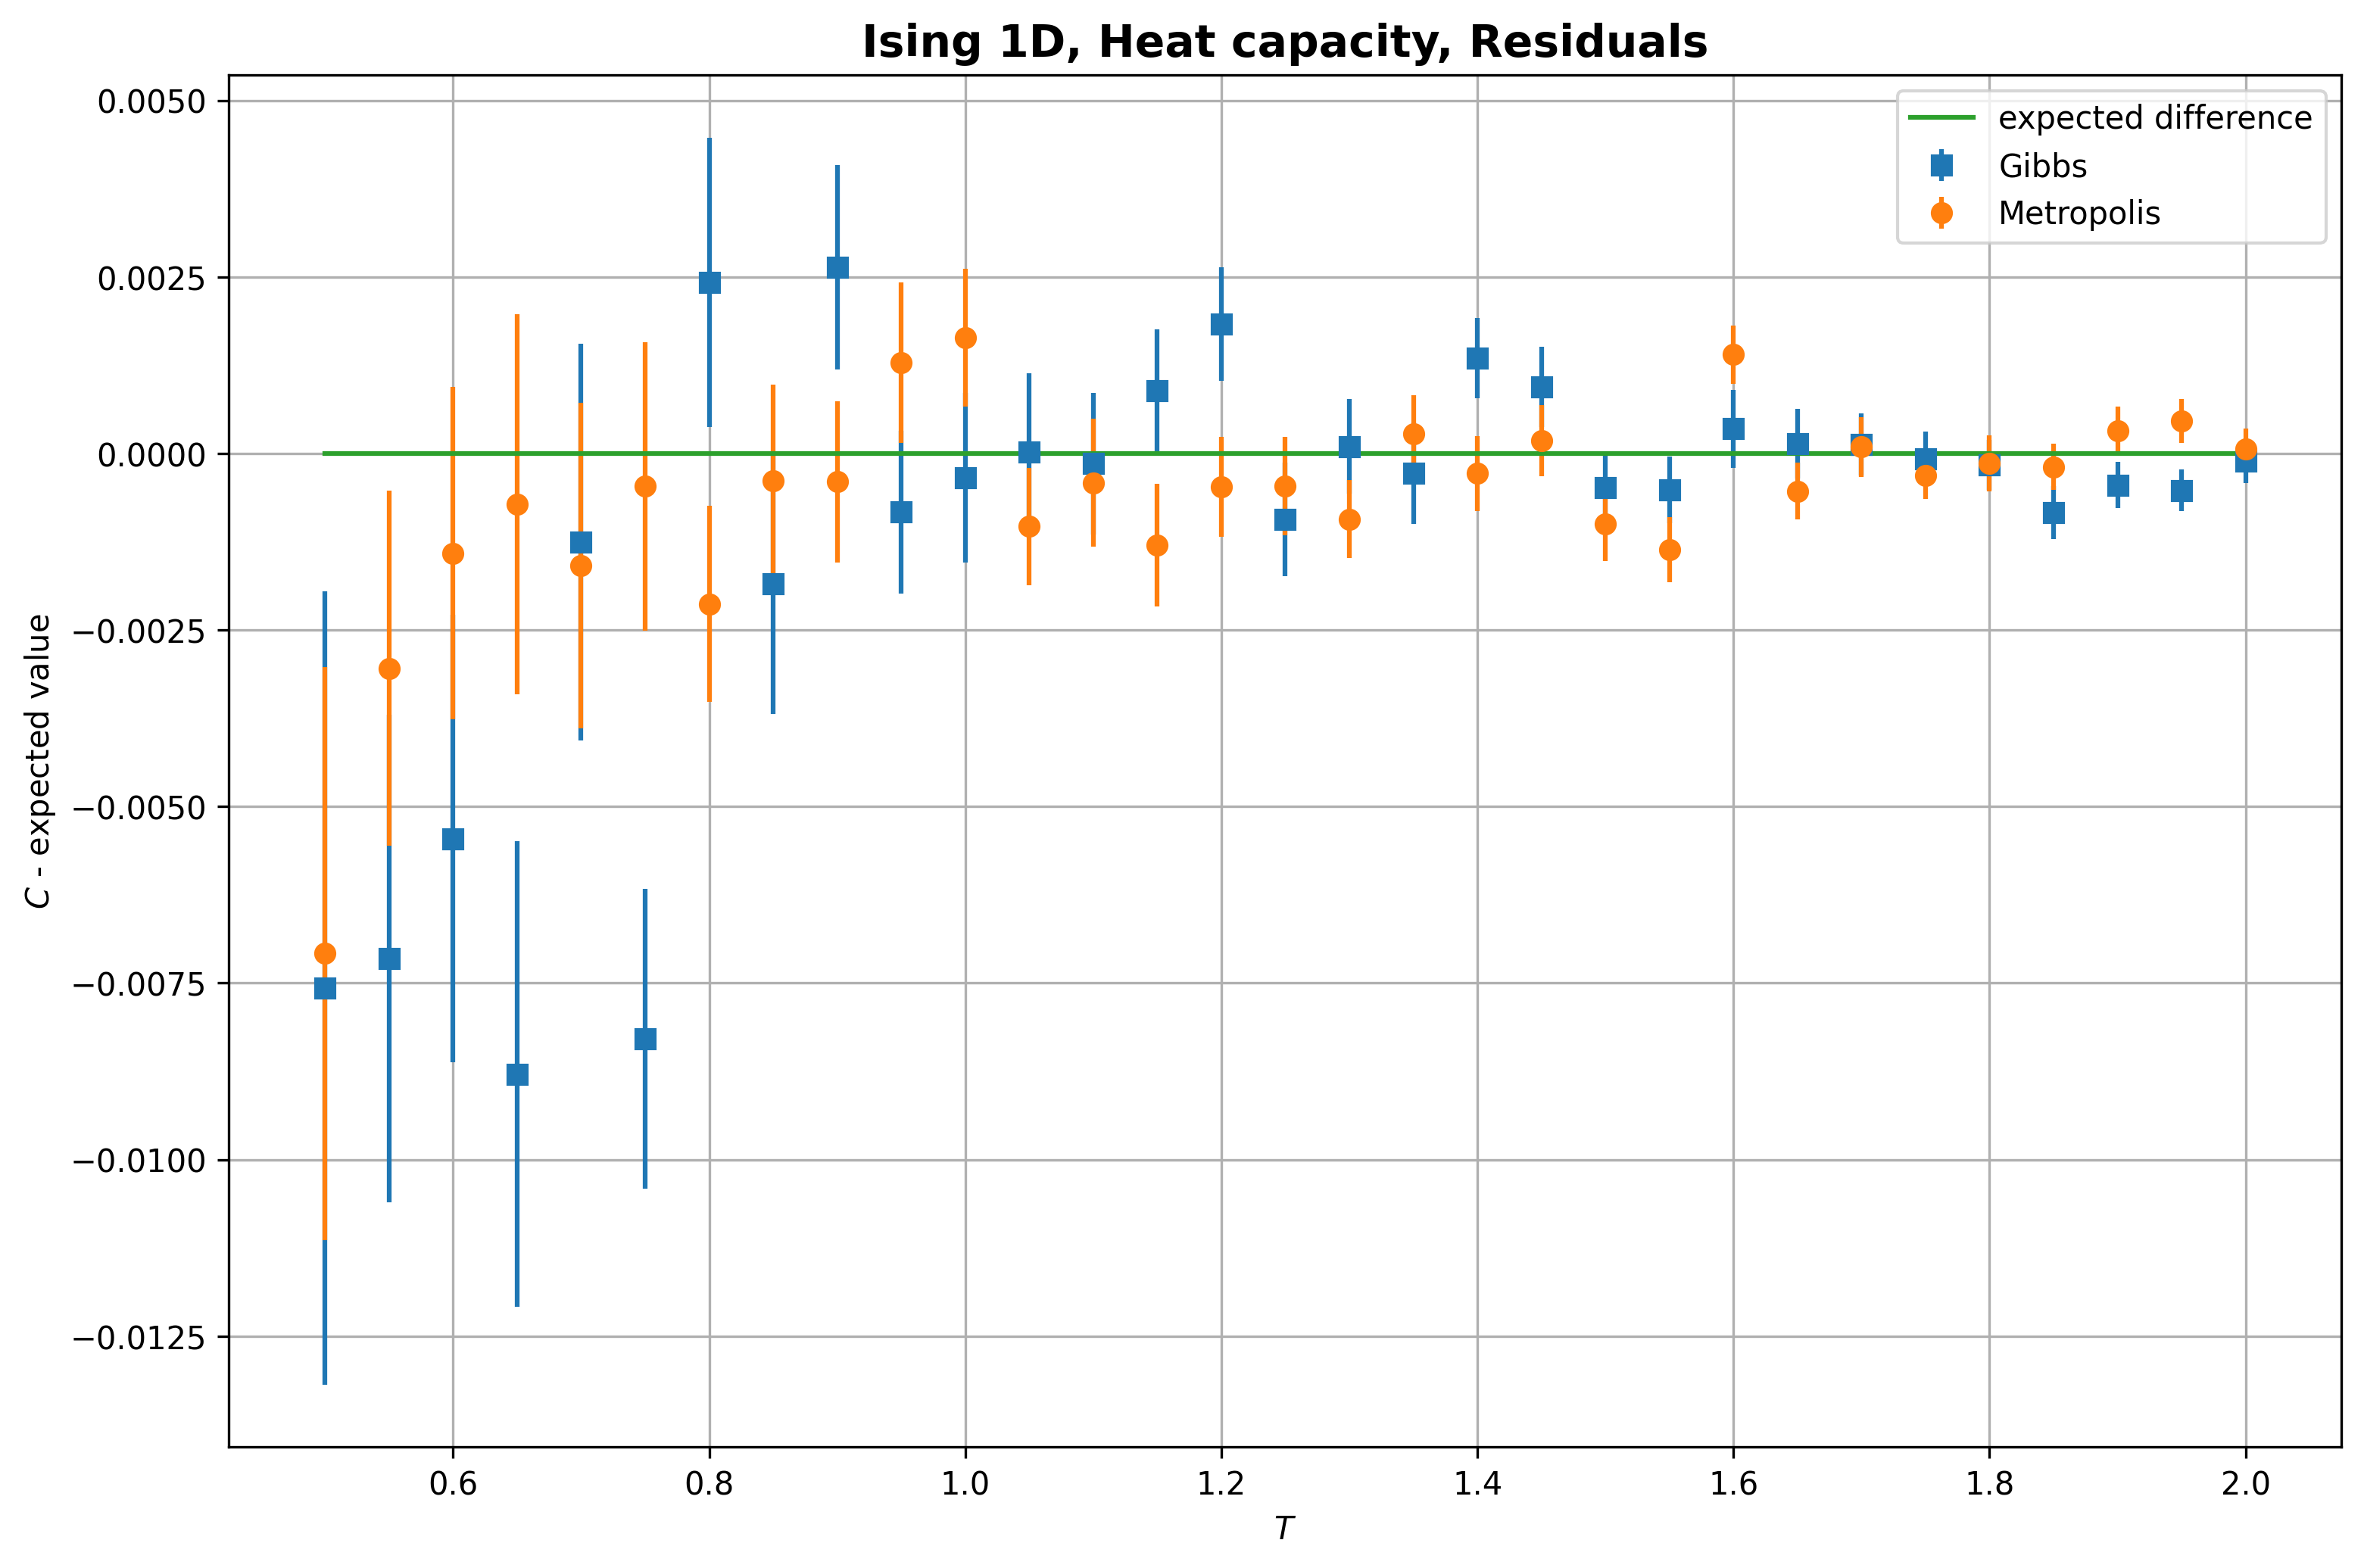

------------------------------------------------------------------------------------------


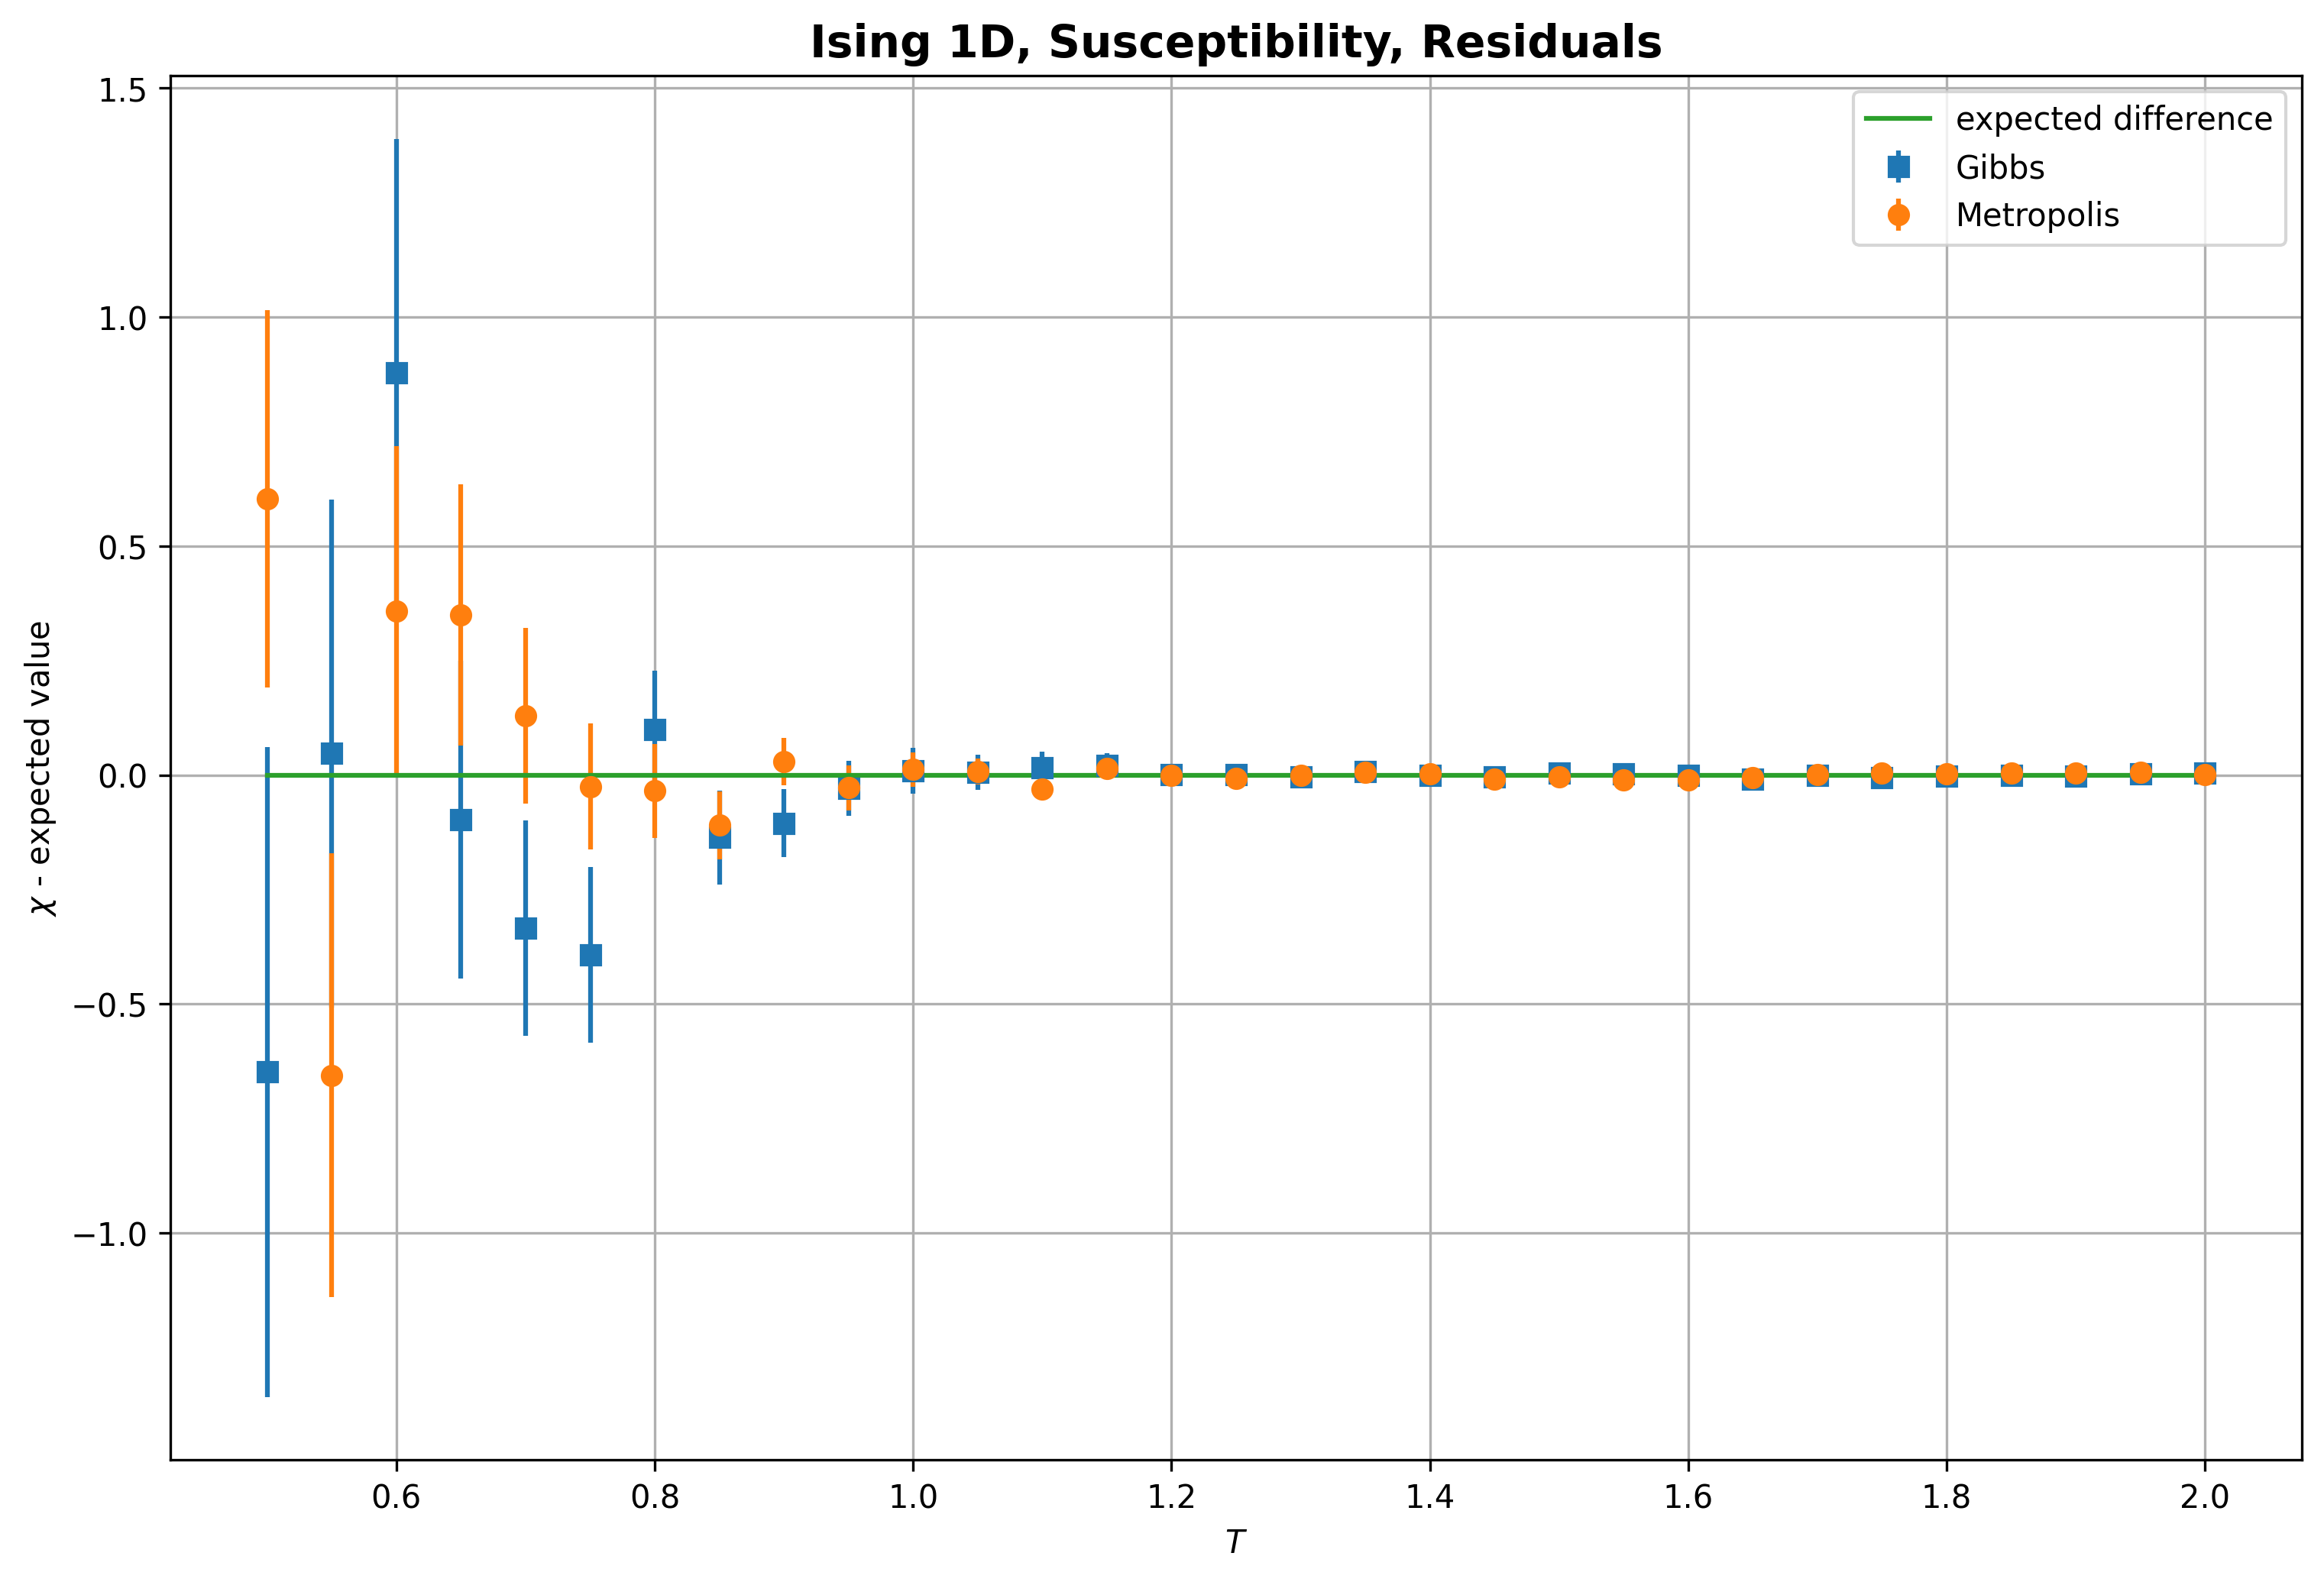

------------------------------------------------------------------------------------------


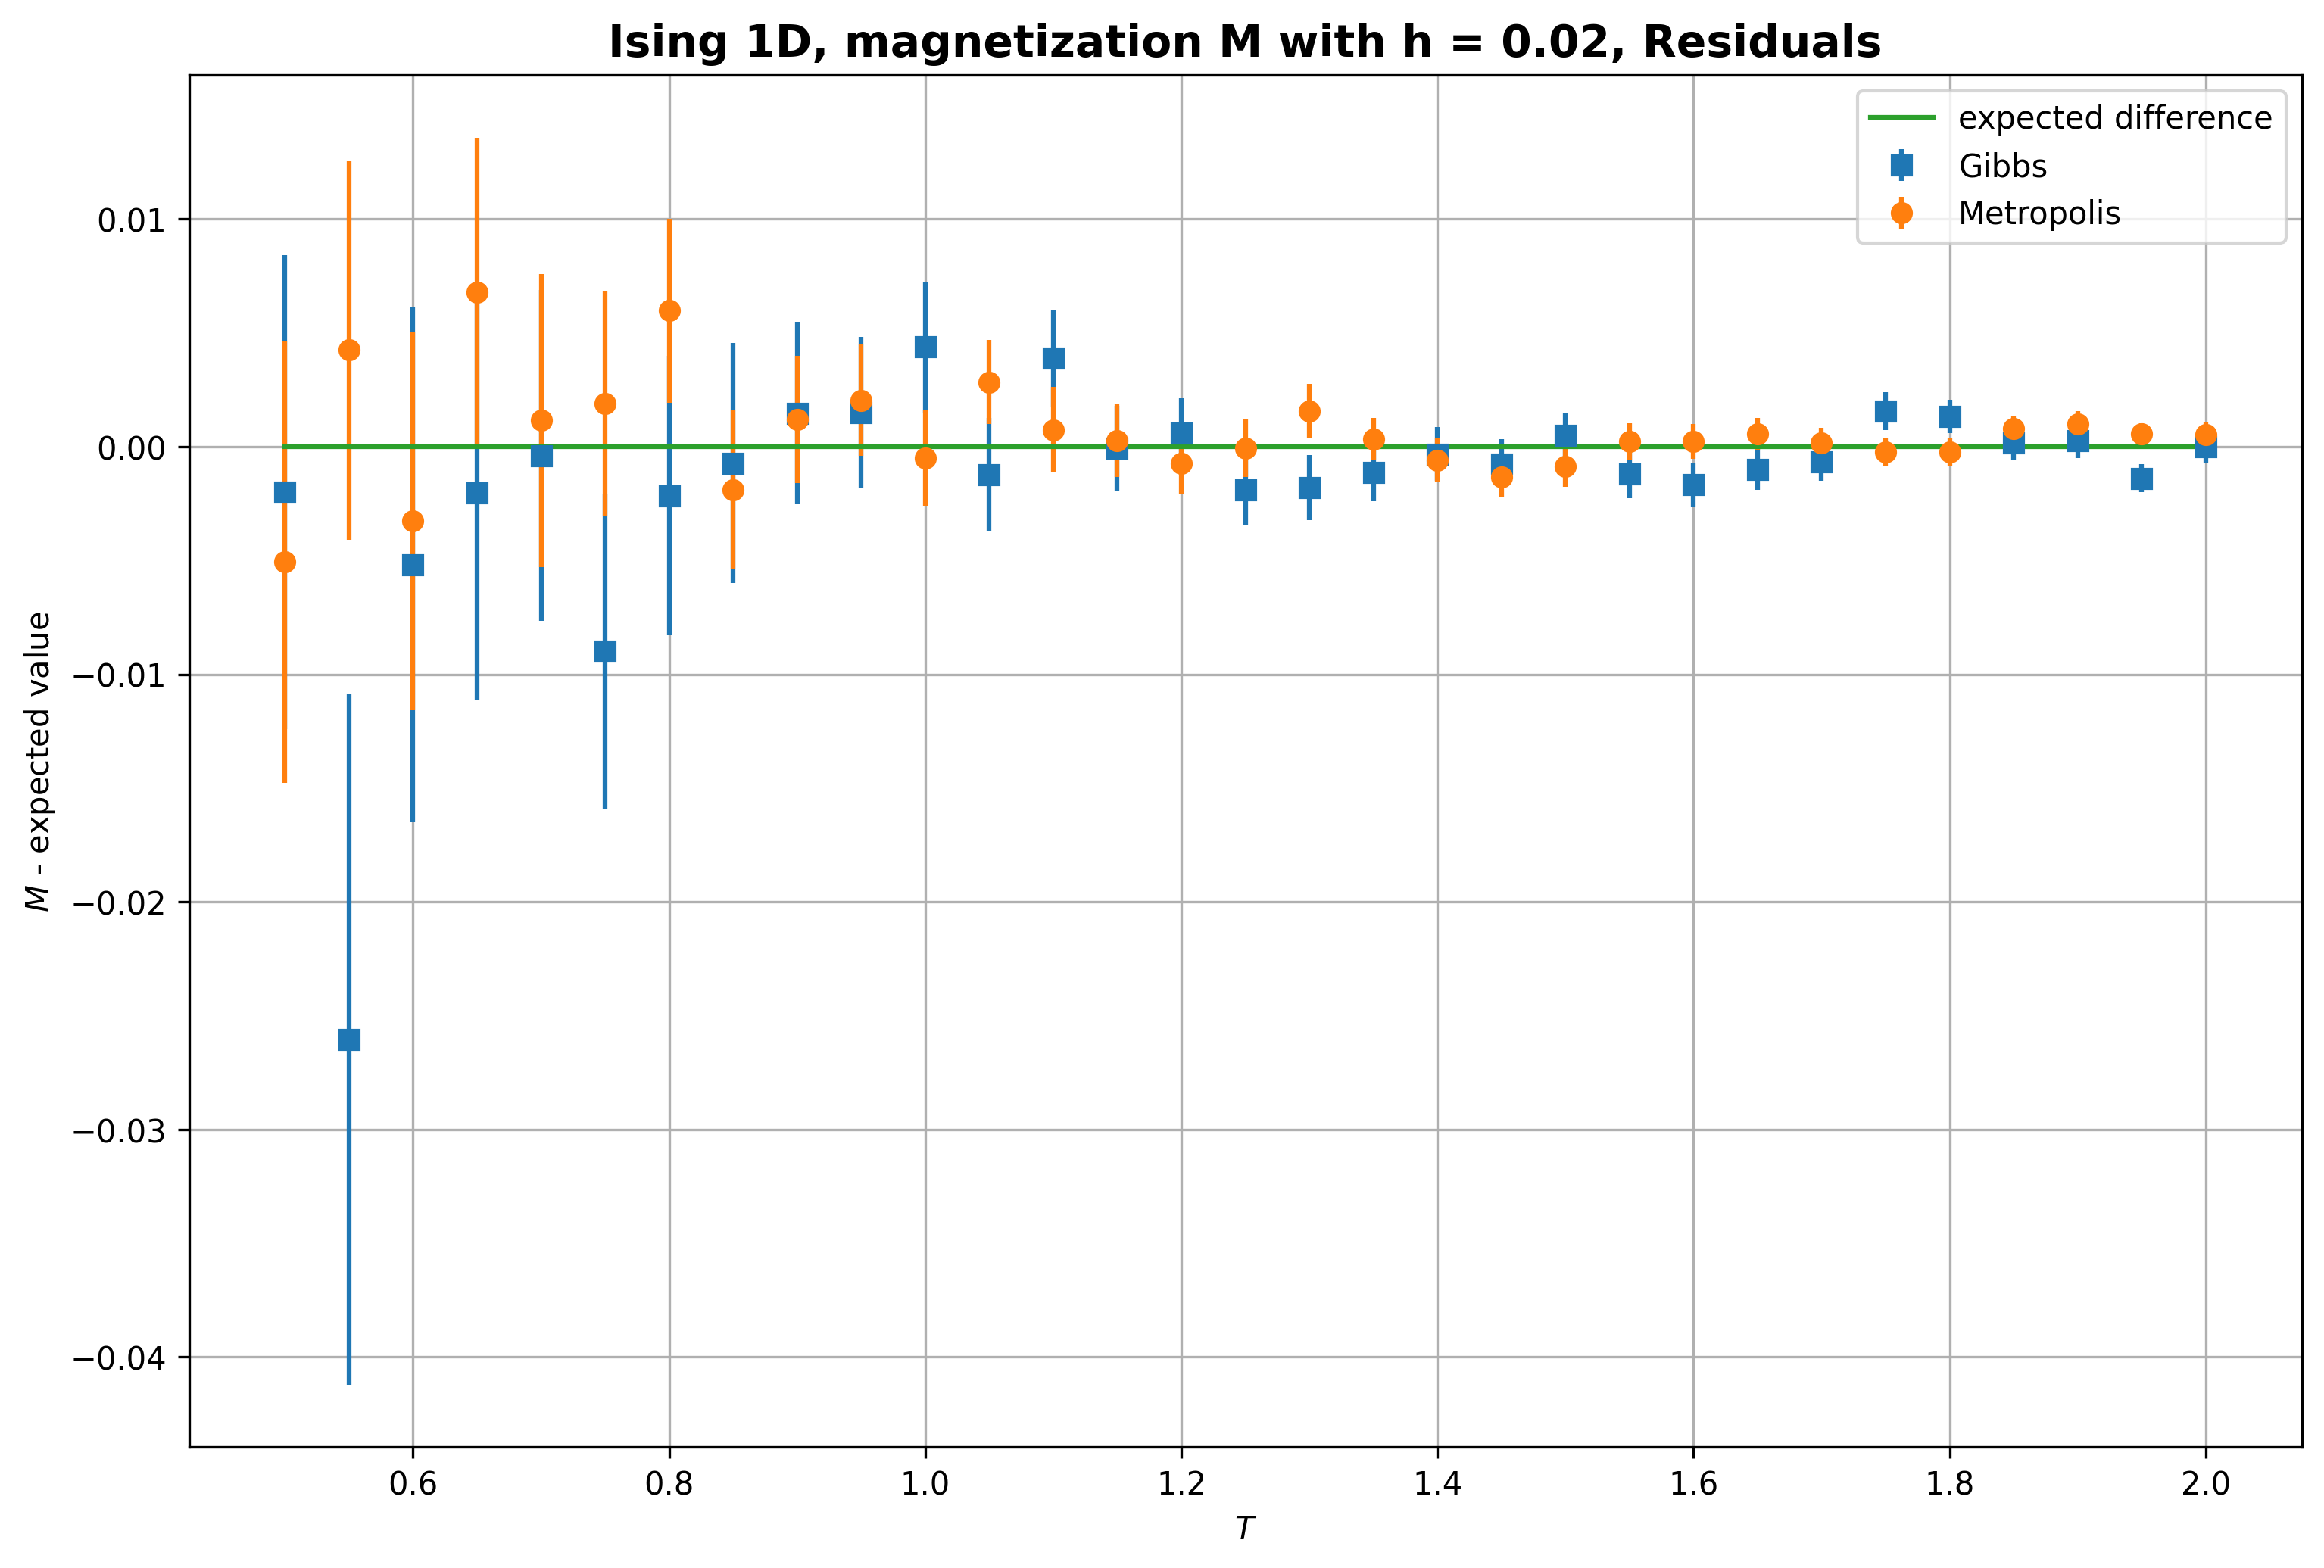

------------------------------------------------------------------------------------------


In [6]:
print('--------------------------------------------------------------------------------------------------')

#U/N
points=31
T = np.linspace(2.0,0.5,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )
#Heat
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)
#Chi
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)
#M
h=0.02 #external field
b = 1/T
l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)
Results=[e,heat,X,M]
Titles=["Ising 1D, internal energy, Residuals",'Ising 1D, Heat capacity, Residuals','Ising 1D, Susceptibility, Residuals','Ising 1D, magnetization M with h = 0.02, Residuals']
expected = 0.0*x
for j in file:
    fig=plt.figure(figsize=(12,8),dpi=300,edgecolor="blue")
        
    for i in folder:
        x , y, f, error = np.loadtxt("ISING_1D/results/"+i+"/output."+j+".0", usecols=(0,1,2,3), unpack='true')
        #yerr=2*error --> within 2 std deviations.
        plt.errorbar(x,(f-Results[file.index(j)]),yerr=error,label = method[folder.index(i)],fmt=ind[folder.index(i)])
    plt.plot(x,expected,label="expected difference")
    plt.xlabel('$T$')
    plt.ylabel(name[file.index(j)]+" - expected value")
    plt.grid(True)
    plt.legend()
    plt.title(Titles[file.index(j)],weight="bold",size="14")
    plt.show()
    
    print("------------------------------------------------------------------------------------------")

The majority of the results are within 2 standard deviations from the analytical values, but  we notice that as T is decreased the uncertainty increases. At $T=0.5$ the system is almost frozen and the acceptance rate in the Metropolis algorithm drops to $\approx 5\%$.
